In [425]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


In [426]:
# Load dataset
df = pd.read_csv('../Assets/Data/Lung Cancer Dataset.csv')



In [427]:


# Remove rows with missing values
df = df.dropna()

# Convert 'PULMONARY_DISEASE' column to integer (No → 0, Yes → 1)
if 'PULMONARY_DISEASE' in df.columns:
    df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'No': 0, 'Yes': 1, 'YES': 1, 'NO': 0}).fillna(0).astype(int)

# ✅ Check if encoding is needed
categorical_cols = ['GENDER', 'SMOKING', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 
                    'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'ALCOHOL_CONSUMPTION']

for col in categorical_cols:
    print(f"🔹 {col} Unique Values: {df[col].unique()}")  # Check if encoding is necessary

# 🚀 No encoding needed if all values are already numeric!


🔹 GENDER Unique Values: [1 0]
🔹 SMOKING Unique Values: [1 0]
🔹 EXPOSURE_TO_POLLUTION Unique Values: [1 0]
🔹 LONG_TERM_ILLNESS Unique Values: [0 1]
🔹 FAMILY_HISTORY Unique Values: [0 1]
🔹 SMOKING_FAMILY_HISTORY Unique Values: [0 1]
🔹 ALCOHOL_CONSUMPTION Unique Values: [1 0]


In [428]:
# Select features and target variable
features = df.drop(columns=['PULMONARY_DISEASE', 'GENDER'])
target = df['PULMONARY_DISEASE']

# Split dataset into training and testing sets (80%-20%)
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Define numerical columns to scale
numerical_cols = ['AGE', 'OXYGEN_SATURATION', 'ENERGY_LEVEL', 'STRESS_IMMUNE']

# Scale numerical features using StandardScaler
scaler = StandardScaler()
train_features[numerical_cols] = scaler.fit_transform(train_features[numerical_cols])
test_features[numerical_cols] = scaler.transform(test_features[numerical_cols])

# Save the scaler for prediction use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [429]:
# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(train_features, train_target)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_target)

# Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(train_features, train_target)

# Train XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss', verbosity=1)
xgb_model.fit(train_features, train_target)




# ✅ Save All Models
joblib.dump(log_model, 'logistic_regression.pkl')
joblib.dump(rf_model, 'random_forest.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

📌 Logistic Regression Performance:
✅ Accuracy: 0.888
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       593
           1       0.85      0.88      0.86       407

    accuracy                           0.89      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.89      0.89      0.89      1000

📌 Random Forest Performance:
✅ Accuracy: 0.906
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       593
           1       0.89      0.88      0.88       407

    accuracy                           0.91      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.91      0.91      0.91      1000

📌 SVM Performance:
✅ Accuracy: 0.878
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       593
           1       0.84      0.87      0.85       407

    accuracy                           0.88  

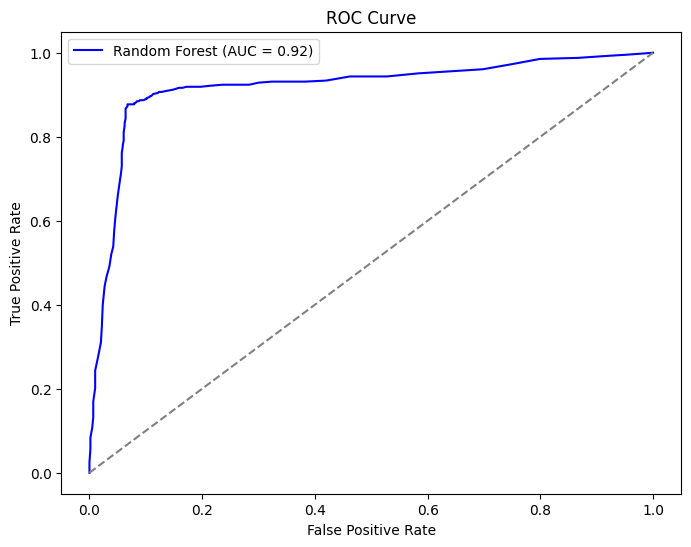

In [430]:
models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 
          'SVM': svm_model, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(test_features)
    print(f"📌 {name} Performance:")
    print("✅ Accuracy:", accuracy_score(test_target, y_pred))
    print(classification_report(test_target, y_pred))

# ROC Curve for Best Model (Random Forest)
y_prob_rf = rf_model.predict_proba(test_features)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_target, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [431]:


# Remove rows with missing values
df = df.dropna()

# Convert 'PULMONARY_DISEASE' column to integer (No → 0, Yes → 1)
if 'PULMONARY_DISEASE' in df.columns:
    df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'No': 0, 'Yes': 1, 'YES': 1, 'NO': 0}).fillna(0).astype(int)

# ✅ Check if encoding is needed
categorical_cols = ['GENDER', 'SMOKING', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 
                    'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'ALCOHOL_CONSUMPTION']

for col in categorical_cols:
    print(f"🔹 {col} Unique Values: {df[col].unique()}")  # Check if encoding is necessary

# 🚀 No encoding needed if all values are already numeric!


🔹 GENDER Unique Values: [1 0]
🔹 SMOKING Unique Values: [1 0]
🔹 EXPOSURE_TO_POLLUTION Unique Values: [1 0]
🔹 LONG_TERM_ILLNESS Unique Values: [0 1]
🔹 FAMILY_HISTORY Unique Values: [0 1]
🔹 SMOKING_FAMILY_HISTORY Unique Values: [0 1]
🔹 ALCOHOL_CONSUMPTION Unique Values: [1 0]
